**CREATING CUSTOM DATASET - GOOGLE PLAY REVIEWS OF FPS GAMES**

In [ ]:
!pip install -qq google-play-scraper

In [ ]:
# importing necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

In [ ]:
app_packages = [
               "com.activision.callofduty.shooter", # cod
               "com.gameloft.android.ANMP.GloftM5HM", # modern combat
               "com.dts.freefireth", # free fire
               "com.gameloft.android.ANMP.GloftNOHM", # nova legacy
               "com.appsomniacs.da2" # mini militia
]

app_infos = []

for app_package in tqdm(app_packages):
    info = app(app_package, lang='en', country='in')
    del info['comments']
    app_infos.append(info) 

100%|██████████| 5/5 [00:00<00:00,  5.80it/s]


In [ ]:
# printing a pretty json of the received data
def print_json(json_obj):
    json_str = json.dumps(
        json_obj,
        indent=2,
        sort_keys=True,
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

print_json(app_infos[0])

{
  "adSupported": true,
  "androidVersion": "4.3",
  "androidVersionText": "4.3 and up",
  "appId": "com.activision.callofduty.shooter",
  "containsAds": true,
  "contentRating": "Rated for 16+",
  "contentRatingDescription": "Strong Violence",
  "currency": "USD",
  "description": "Official CALL OF DUTY\u00ae designed exclusively for mobile phones. Play iconic multiplayer maps and modes anytime, anywhere. 100 player Battle Royale battleground? Fast 5v5 team deathmatch? Sniper vs sniper battle? Activision\u2019s free-to-play CALL OF DUTY\u00ae: MOBILE has it all.\r\n\r\nFREE TO PLAY ON MOBILE\r\n\r\nConsole quality HD gaming on your phone with customizable controls, voice and text chat, and thrilling 3D graphics and sound. Experience the thrill of the world\u2019s most beloved shooter game, now on your phone for easy on-the-go fun.\r\n\r\nBELOVED GAME MODES AND MAPS\r\n\r\nPlay iconic multiplayer maps from Call of Duty\u00ae: Black Ops and Call of Duty\u00ae: Modern Warfare\u00ae, ava

In [ ]:
# converting json file to pandas df
df = pd.DataFrame(app_infos)

df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,Call of Duty®: Mobile - Tokyo Escape,Official CALL OF DUTY® designed exclusively fo...,Official CALL OF DUTY® designed exclusively fo...,"Call of Duty: Mobile offers PVP, Battle Royale...","Call of Duty: Mobile offers PVP, Battle Royale...","100,000,000+",100000000,4.480130,13231417,6013455,"[980475, 256506, 485912, 1215376, 10293148]",0,True,USD,False,None,None,None,True,"₹10.00 - ₹7,900.00 per item",91M,4.3,4.3 and up,"Activision Publishing, Inc.","Activision+Publishing,+Inc.",CoDMobile@activision.com,http://www.activision.com,"3100 Ocean Park Blvd.\nSanta Monica, Californi...",https://www.activision.com/legal/privacy-policy,5463239933051156834,Action,GAME_ACTION,https://play-lh.googleusercontent.com/9Y-xblw8...,https://play-lh.googleusercontent.com/Mj_JSobb...,[https://play-lh.googleusercontent.com/k0JLJS4...,https://www.youtube.com/embed/gFKhZToY-LM?ps=p...,https://i.ytimg.com/vi/gFKhZToY-LM/hqdefault.jpg,Rated for 16+,Strong Violence,True,True,"Sep 30, 2019",1615073414,1.0.20,Only the strongest samurai will survive Call o...,Only the strongest samurai will survive Call o...,False,com.activision.callofduty.shooter,https://play.google.com/store/apps/details?id=...
1,Modern Combat 5: eSports FPS,Start shooting with the game that has it all: ...,Start shooting with the game that has it all: ...,The best multiplayer FPS series raises the bar...,The best multiplayer FPS series raises the bar...,"100,000,000+",100000000,4.236816,3494539,1445458,"[377414, 102909, 215384, 417824, 2381008]",0,True,USD,False,None,None,None,True,"₹10.00 - ₹8,900.00 per item",52M,5.0,5.0 and up,Gameloft SE,4826827787946964969,android.support@gameloft.com,http://www.gameloft.com/,14 rue Auber 75009 Paris,http://www.gameloft.com/privacy-notice/,4826827787946964969,Action,GAME_ACTION,https://play-lh.googleusercontent.com/WPP5y9dz...,https://play-lh.googleusercontent.com/tPYOrMZT...,[https://play-lh.googleusercontent.com/nNjmESX...,https://www.youtube.com/embed/Bmuzjul8wS4?ps=p...,https://i.ytimg.com/vi/Bmuzjul8wS4/hqdefault.jpg,Rated for 16+,"Strong Violence, Strong Language",True,True,"Jul 23, 2014",1614602255,5.8.1c,Welcome to this new update!\r\n\r\nFlamed weap...,Welcome to this new update!<br><br>Flamed weap...,True,com.gameloft.android.ANMP.GloftM5HM,https://play.google.com/store/apps/details?id=...
2,Garena Free Fire- World Series,Free Fire is the ultimate survival shooter gam...,Free Fire is the ultimate survival shooter gam...,10-minute Survival Shooter!,10-minute Survival Shooter!,"500,000,000+",500000000,4.295106,84138354,49968623,"[10669833, 1973644, 2988722, 4730932, 63775223]",0,True,USD,False,None,None,None,True,"₹10.00 - ₹9,000.00 per item",Varies with device,4.1,4.1 and up,GARENA INTERNATIONAL I PRIVATE LIMITED,GARENA+INTERNATIONAL+I+PRIVATE+LIMITED,freefire@garena.com,https://ff.garena.com,"1 FUSIONOPOLIS PLACE, 17-10, GALAXIS, Singapore",https://ff.garena.com/others/policy/en/,5262113047916054197,Action,GAME_ACTION,https://play-lh.googleusercontent.com/NE5J766Y...,https://play-lh.googleusercontent.com/KxIKOXKi...,[https://play-lh.googleusercontent.com/-T70lja...,https://www.youtube.com/embed/hMBx5jkNi1s?ps=p...,https://i.ytimg.com/vi/hMBx5jkNi1s/hqdefault.jpg,Rated for 12+,Moderate Violence,None,False,"Nov 20, 2017",1617957191,1.60.1,1. Clash Squad Season 6 - Begins 04/15 17:00 G...,1. Clash Squad Season 6 - Begins 04/15 17:00 G...,True,com.dts.freefireth,https://play.google.com/store/apps/details?id=..

In [ ]:
# saving pandas df

df.to_csv('/content/apps.csv', index=None, header=True)

In [ ]:
# getting apps reviews

app_reviews = []

for app_package in tqdm(app_packages):
    for score in range(1, 6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews(
                app_package, 
                lang='en', 
                country='in', 
                sort=sort_order, 
                count = 200 if score == 3 else 100,
                filter_score_with=score
            )
            
            app_reviews.extend(rvs[0])

100%|██████████| 5/5 [00:16<00:00,  3.27s/it]


In [ ]:
len(app_reviews)

6000

In [ ]:
print_json(app_reviews[0])

{
  "at": "2021-04-25 07:36:39",
  "content": "Game keeps on crashing. I get a black screen, with the sound and everything still running. If I minimise and reopen it, the game restarts. In a 3hrs gameplay, this has happened more than 5 times. I'm having Poco X3 Pro brand new mobile and my internet connection is good. This is seriously annoying when the game crashes. Please fix this as soon as possible.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "1.0.20",
  "reviewId": "gp:AOqpTOFDlMgcL0EIskBGj5Twl61m8xDXLPU26EHNEkQ0U-jowMAC26clgQmBz8VDomhw0dW6_Js5SJPSJSFXdg",
  "score": 1,
  "thumbsUpCount": 8,
  "userImage": "https://play-lh.googleusercontent.com/--W6G1vdxNEE/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmYdc5El_x9SXnn4K92pBmpkGrHJA/photo.jpg",
  "userName": "Andruraj A"
}



In [ ]:
# converting json list of reviews to pandas df

reviews_df = pd.DataFrame(app_reviews)

reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFDlMgcL0EIskBGj5Twl61m8xDXLPU26EHNEkQ...,Andruraj A,https://play-lh.googleusercontent.com/--W6G1vd...,"Game keeps on crashing. I get a black screen, ...",1,8,1.0.20,2021-04-25 07:36:39,None,NaT
1,gp:AOqpTOF7wi2nwkP84he3gsaeKsulE30CeLXKLlf4N8Q...,Supreeth Tikare,https://play-lh.googleusercontent.com/a-/AOh14...,After this new update game gets closed saying ...,1,6,1.0.20,2021-04-25 06:36:13,None,NaT
2,gp:AOqpTOGkQ9mTIwPNQ9UPJ5mb3YKIkkXtjYAbmk7otGB...,Abhijit Kasbekar,https://play-lh.googleusercontent.com/a-/AOh14...,Despite having a phone with 8gb Ram and latest...,1,2,1.0.20,2021-04-25 06:59:09,None,NaT
3,gp:AOqpTOF6M1kcZSrJ3KXXuTJpFq8p8hflqQae23u-Kwn...,Prantik Mondal,https://play-lh.googleusercontent.com/a-/AOh14...,"Since last update, most of the time game not o...",1,5,1.0.20,2021-04-24 15:03:21,None,NaT
4,gp:AOqpTOF1ipsEwcLhDTNsIn12lJOdcyF6KAXDe6zINwi...,NL Paradox,https://play-lh.googleusercontent.com/a-/AOh14...,The game wasn't bad when I first started it ab...,1,1461,1.0.20,2021-03-27 12:56:36,None,NaT


In [ ]:
# shape of final df

reviews_df.shape

(6000, 10)

In [ ]:
# saving reviews df to csv

reviews_df.to_csv('reviews_df', index=None, header=True)

**TEXT FEATURE ENGINEERING**

In [ ]:
reviews_df = pd.read_csv("/content/reviews_df")

In [ ]:
# our final df is "reviews_df", important cols are = 'content' and 'score'

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4484 non-null   object
 7   at                    6000 non-null   object
 8   replyContent          39 non-null     object
 9   repliedAt             39 non-null     object
dtypes: int64(2), object(8)
memory usage: 468.9+ KB


In [ ]:
# distribution of target classes

reviews_df['score'].value_counts()

3    2000
2    1000
5    1000
1    1000
4    1000
Name: score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score')

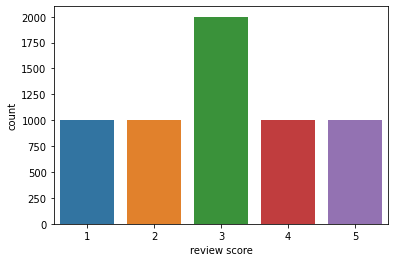

In [ ]:
# another method to analize distribution of target classes using seaborn

sns.countplot(reviews_df.score)
plt.xlabel('review score')

In [ ]:
# now we will group together the scores (1 and 2) as negative, 3 alone as neutral, (4 and 5) as positive.

def convert_sentiments(rating_score):
    rating_score = int(rating_score)
    if rating_score <= 2:
        return 0
    elif rating_score == 3:
        return 1
    else: return 2

reviews_df['sentiment'] = reviews_df['score'].apply(lambda x: convert_sentiments(x))

In [ ]:
output_classes = ['negative', 'neutral', 'positive']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')]

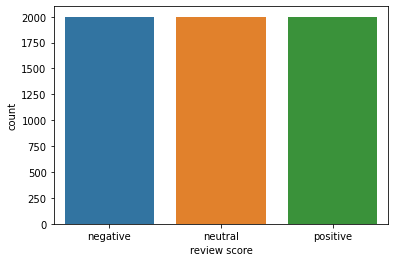

In [ ]:
ax = sns.countplot(reviews_df['sentiment'])
plt.xlabel('review score')
ax.set_xticklabels(output_classes)

**DATA PREPROCESSING FOR BERT**

In [ ]:
!pip install transformers

In [ ]:
import torch
import torch.nn as nn
import transformers

from sklearn.model_selection import train_test_split

Transformer Bert Base Tokenizer

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased') # cased = if capital, remains capital

In [ ]:
# let's get a trailer of what this tokenizer can do ->

sample_text = 'I just want success in my life and lots of money so I can travel the world'
print(f'sample text : {sample_text}')

tokens = tokenizer.tokenize(sample_text)
print(f'tokens ({len(tokens)}) : {tokens}')

token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f'token ids ({len(token_ids)}) : {token_ids}')

sample text : I just want success in my life and lots of money so I can travel the world
tokens (17) : ['I', 'just', 'want', 'success', 'in', 'my', 'life', 'and', 'lots', 'of', 'money', 'so', 'I', 'can', 'travel', 'the', 'world']
token ids (17) : [146, 1198, 1328, 2244, 1107, 1139, 1297, 1105, 7424, 1104, 1948, 1177, 146, 1169, 3201, 1103, 1362]


In [ ]:
# special tokens needed for BERT sequence classification ->

print(f'Separation Token : {tokenizer.sep_token}')
print(f'Separation Token Id : {tokenizer.sep_token_id}')
print()
print(f'Classification Token : {tokenizer.cls_token}')
print(f'Classification Token Id : {tokenizer.cls_token_id}')
print()
print(f'Padding Token : {tokenizer.pad_token}')
print(f'Padding Token Id : {tokenizer.pad_token_id}')
print()
print(f'Unkown Token : {tokenizer.unk_token}')
print(f'Unkown Token Id : {tokenizer.unk_token_id}')

Separation Token : [SEP]
Separation Token Id : 102

Classification Token : [CLS]
Classification Token Id : 101

Padding Token : [PAD]
Padding Token Id : 0

Unkown Token : [UNK]
Unkown Token Id : 100


In [ ]:
# encoding of text to BERT input

encoding = tokenizer.encode_plus(
    sample_text,
    max_length=20,
    add_special_tokens=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_token_type_ids=False,
    return_tensors='pt'
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
print(len(encoding['input_ids'][0]))
print(encoding['input_ids'])
print()
print(len(encoding['attention_mask'][0]))
print(encoding['attention_mask'])

20
tensor([[ 101,  146, 1198, 1328, 2244, 1107, 1139, 1297, 1105, 7424, 1104, 1948,
         1177,  146, 1169, 3201, 1103, 1362,  102,    0]])

20
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


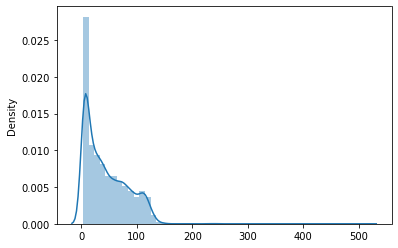

In [ ]:
# max sequence length in our dataset

tokens_len = []

for text in reviews_df['content']:
    tokens = tokenizer.encode(text, max_length=512)
    tokens_len.append(len(tokens))

sns.distplot(tokens_len)

**CREATING TORCH DATASET**

In [ ]:
class GooglePlayReviewDataset(torch.utils.data.Dataset):
    def __init__(self, review, target, tokenizer, max_len):
        self.review = review
        self.target = target
        self.tokenzier = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.review)
    
    def __getitem__(self, item):
        review = str(self.review[item])

        encoding = tokenizer.encode_plus(
            review,
            max_length=self.max_len,
            add_special_tokens=True,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt'
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(self.target[item], dtype=torch.long)
        }

In [ ]:
# defining hyper-parameters

MAX_LEN = 130
BATCH_SIZE = 8
EPOCHS = 30

In [ ]:
df_train, df_test = train_test_split(reviews_df, test_size=0.2, random_state=42)

In [ ]:
df_val = df_train.iloc[4000:, :]
df_train = df_train.iloc[:4000, :]

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((4000, 11), (800, 11), (1200, 11))

**CREATING PYTORCH DATALOADER**

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    gprd = GooglePlayReviewDataset(
        review=reviews_df['content'].to_numpy(),
        target=reviews_df['sentiment'].to_numpy(),
        tokenizer=tokenizer,
        max_len=MAX_LEN
    )

    return torch.utils.data.DataLoader(
        dataset=gprd,
        batch_size=batch_size,
        num_workers=4
    )

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

Taking a look at our TRAIN_DATA_LOADER

In [ ]:
data = next(iter(train_data_loader)) # returns the next batch of data i.e. 8 encoded reviews
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape) # shape = batch_size, feature, max_len
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([8, 130])
torch.Size([8, 130])
torch.Size([8])


Transformer Bert Base Model

In [ ]:
bert_model = transformers.BertModel.from_pretrained('bert-base-cased')

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask'],
  return_dict=False
)

The last_hidden_state is a sequence of hidden states of the last layer of the model. Obtaining the pooled_output is done by applying the BertPooler on last_hidden_state

In [ ]:
last_hidden_state.shape, pooled_output.shape

(torch.Size([1, 20, 768]), torch.Size([1, 768]))

We have the hidden state for each of our 20 tokens (the length of our example sequence). 768 is the number of hidden units in the feedforward-networks : bert_model.config.hidden_size = 768.
We need the pooled_output not last_hidden_state.

BUILDING THE SENTIMENT CLASSIFIER

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = transformers.BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(p=0.3)
        self.linear = nn.Linear(self.bert.config.hidden_size, n_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids, attention_mask, return_dict=False)
        output = self.dropout(pooled_output)
        output = self.linear(output)
        result = self.softmax(output)
        return result

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = SentimentClassifier(len(output_classes))
model = model.to(device) # sending model to GPU :D

TRAINING

In [ ]:
optimizer = transformers.AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader)*EPOCHS

scheduler = transformers.get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_function = nn.CrossEntropyLoss().to(device)

In [ ]:
def train(model, data_loader, optimizer, loss_fn, device, scheduler, n_examples):
    
    model = model.train()

    losses = []
    correct_predictions = 0

    for dictionary in data_loader:
        input_ids = dictionary['input_ids'].to(device)
        attention_mask = dictionary['attention_mask'].to(device)
        targets = dictionary['targets'].to(device)

        results = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
        )

        output_class = torch.argmax(results, dim=1)

        loss = loss_function(results, targets)

        correct_predictions += torch.sum(output_class == targets)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double()/n_examples, np.mean(losses)

In [ ]:
def eval(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)

            results = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            )

            output_class = torch.argmax(results, dim=1)

            loss = loss_function(results, targets)

            correct_predictions += torch.sum(output_class == targets)
            losses.append(loss.item())

    return correct_predictions.double()/n_examples, np.mean(losses)

In [ ]:
MODEL_PATH = 'model_base_cased.bin'

history = defaultdict(list)
best_acc = 0

for epoch in range(EPOCHS):

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print("-"*10)

    train_acc, train_loss = train(
        model, 
        train_data_loader, 
        optimizer, 
        loss_function, 
        device, 
        scheduler, 
        len(df_train)
    )

    print(f"Train loss : {train_loss}, Train Accuracy : {train_acc}")

    val_acc, val_loss = eval(
        model, 
        val_data_loader, 
        loss_function, 
        device, 
        len(df_val)
    )

    print(f"Val loss : {val_loss}, Val Accuracy : {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_acc:
        torch.save(model.state_dict(), MODEL_PATH)
        best_acc = val_acc

Epoch 1/30
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

Train loss : 1.1381433832645416, Train Accuracy : 0.3665


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1028523078759511, Val Accuracy : 2.5

Epoch 2/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.136641446908315, Train Accuracy : 0.36625


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1027538673877717, Val Accuracy : 2.5

Epoch 3/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1347591642538706, Train Accuracy : 0.3735


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1021164059638977, Val Accuracy : 2.5

Epoch 4/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1330866839090983, Train Accuracy : 0.3665


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.101926366488139, Val Accuracy : 2.5

Epoch 5/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1302879874706269, Train Accuracy : 0.37625000000000003


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1016644287109374, Val Accuracy : 2.5

Epoch 6/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1284431379636128, Train Accuracy : 0.39


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1012469471295674, Val Accuracy : 2.5

Epoch 7/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1273677631219228, Train Accuracy : 0.399


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1008720402717591, Val Accuracy : 2.5

Epoch 8/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1301302931308745, Train Accuracy : 0.37625000000000003


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1006396547953288, Val Accuracy : 2.5

Epoch 9/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1288182303905487, Train Accuracy : 0.381


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1006144285202026, Val Accuracy : 2.5

Epoch 10/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1269140817324321, Train Accuracy : 0.38725


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.100361796538035, Val Accuracy : 2.5

Epoch 11/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.124854060570399, Train Accuracy : 0.38975


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.1000916134516399, Val Accuracy : 2.5

Epoch 12/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1265185118516285, Train Accuracy : 0.38725


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss : 1.0999382840792338, Val Accuracy : 2.5

Epoch 13/30
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss : 1.1240217927296956, Train Accuracy : 0.40700000000000003


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

LOADING THE MODEL

In [ ]:
model = SentimentClassifier(len(output_classes))
model.load_state_dict(torch.load('model_base_cased.bin'))
model.to(device)

EVALUATION

In [ ]:
def get_reviews(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    actual_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d['review_text']
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)

            results = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
            )

            output_class = torch.argmax(results, dim=1)

            review_texts.extend(texts)
            predictions.extend(output_class)
            prediction_probs.extend(results)
            actual_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    actual_values = torch.stack(actual_values).cpu()

    return review_texts, predictions, prediction_probs, actual_values

In [ ]:
test_acc, test_loss = eval(model, test_data_loader, loss_function, device, len(df_test))

print(f"Test Accuracy : {test_acc.item()}, Test Loss : {test_loss.item()}")

In [ ]:
y_review_texts, y_pred, y_preds_probs, y_test = get_reviews(model, test_data_loader)

In [ ]:
print(classification_report(y_test, y_pred, target_names=output_classes))

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

PREDICTION ON RAW TEXT

In [ ]:
raw_text = 'I played this game for 2 weeks and I found it quite good, the interface and the recoil seems playable.'

In [ ]:
encoding_on_raw_text = tokenizer.encode_plus(
    raw_text,
    max_len=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt'
) 

In [ ]:
raw_input_ids = encoding_on_raw_text['input_ids'].to(device)
raw_attention_mask = encoding_on_raw_text['attention_mask'].to(device)

In [ ]:
output = model(raw_input_ids, raw_attention_mask)
prediction = torch.argmax(output, dim=1)

In [ ]:
print(f"Raw Text : {raw_text}")
print()
print(f"Sentiment : {output_classes[prediction]}")